## Exploratory Data Analysis

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [14]:
nba = pd.read_csv('nba_cleaned.csv', index_col=0)

In [15]:
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,35,2,491,84,145,...,0.543,46,95,141,20,15,19,32,58,212
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,...,0.000,0,3,3,2,0,0,0,1,2
2,3,Steven Adams,C,27,NOP,33,33,918,115,187,...,0.443,133,161,294,69,29,20,50,63,265
3,4,Bam Adebayo,C,23,MIA,33,33,1119,236,419,...,0.847,72,241,313,179,29,34,98,80,634
4,5,LaMarcus Aldridge,C,35,SAS,21,18,544,115,248,...,0.838,17,77,94,36,8,18,20,36,288


### Point Analysis

In [16]:
# Top 5 scoring players
print(nba.groupby(['Player'])['PTS'].sum().sort_values(ascending = False).head(5))
top_5 = nba.groupby(['Player'])['PTS'].sum().sort_values(ascending = False).head(5).index.tolist()

Player
James Harden             1568
Bradley Beal             1053
Stephen Curry            1039
Giannis Antetokounmpo    1015
Damian Lillard           1013
Name: PTS, dtype: int64


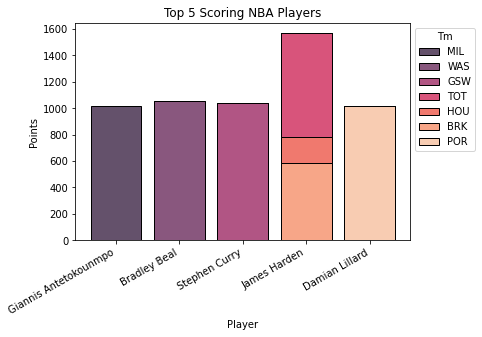

In [19]:
nba_top_5 = nba[nba['Player'].isin(top_5)]

ax1 = sns.histplot(data=nba_top_5, x='Player', hue='Tm', weights='PTS',
             multiple='stack', palette='rocket', shrink=0.8)
ax1.set_title('Top 5 Scoring NBA Players')
ax1.set_ylabel('Points')
plt.xticks(rotation=30, ha='right')

# Fix the legend so it's not on top of the bars.
legend = ax1.get_legend()
legend.set_bbox_to_anchor((1, 1))

James Harden's statistics seem too high, this needs to be investigated further. 

In [20]:
nba_top_5[nba_top_5['Player'] == 'James Harden']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
182,182,James Harden,PG-SG,31,TOT,31,31,1173,250,517,...,0.859,26,216,242,345,36,21,131,67,784
183,182,James Harden,SG,31,HOU,8,8,290,60,135,...,0.883,5,36,41,83,7,6,34,14,198
184,182,James Harden,PG,31,BRK,23,23,883,190,382,...,0.850,21,180,201,262,29,15,97,53,586


After some research, it seems that the team name of 'TOT' refers to a players total number of points for the season based on the aggregation of statistics from each team. With this in mind, we only need to consider James Hardens' TOT entry, as this aggregates HOU and BRK.

In [21]:
print(nba.groupby(['Player', 'Tm'])['PTS'].sum().sort_values(ascending = False).head(5))
top_5 = nba.groupby(['Player', 'Tm'])['PTS'].sum().sort_values(ascending = False).head(5).index.tolist()
nba_top_5 = nba[nba[('Player')].isin([player[0] for player in top_5])]

Player                 Tm 
Bradley Beal           WAS    1053
Stephen Curry          GSW    1039
Giannis Antetokounmpo  MIL    1015
Damian Lillard         POR    1013
Nikola Jokić           DEN     977
Name: PTS, dtype: int64


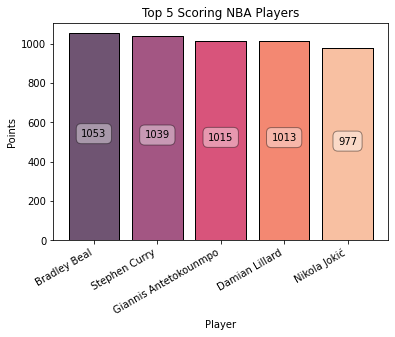

In [22]:
nba_top_5 = nba_top_5.sort_values('PTS', ascending=False).reset_index(drop=True)

ax2 = sns.histplot(data=nba_top_5, x='Player', weights='PTS',
                   multiple='stack', palette='rocket', shrink=0.8, 
                   hue='Player')
ax2.set_title('Top 5 Scoring NBA Players')
ax2.set_ylabel('Points')
plt.xticks(rotation=30, ha='right')
ax2.get_legend().remove()

# Insert chart labels
groupedvalues = nba_top_5.groupby('Player').sum().reset_index()

for index, row in groupedvalues.iterrows():
    ax2.text(row.Player, row.PTS/2, round(row.PTS,2), color='black', ha='center', bbox=dict(facecolor='white', alpha=0.4, boxstyle="round,pad=0.5"))


[]

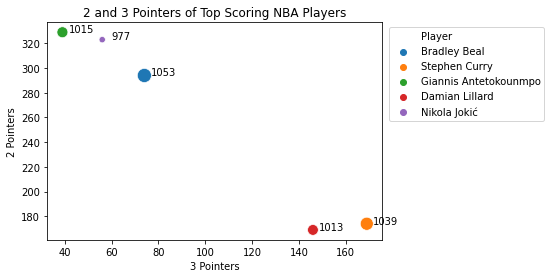

In [25]:
ax3 = sns.scatterplot(data=nba_top_5, x='3P', y='2P', size='PTS', hue='Player', sizes=(40,200))
ax3.set_title('2 and 3 Pointers of Top Scoring NBA Players')

# Setting legend
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels[:6])
ax3.get_legend().set_bbox_to_anchor((1.5, 1))

# Setting text labels
for index, row in groupedvalues.iterrows():
    ax3.text(row['3P']+8, row['2P'], round(row['PTS'],2), color='black', ha='center')
    
ax3.set_xlabel('3 Pointers')
ax3.set_ylabel('2 Pointers')

ax3.plot()

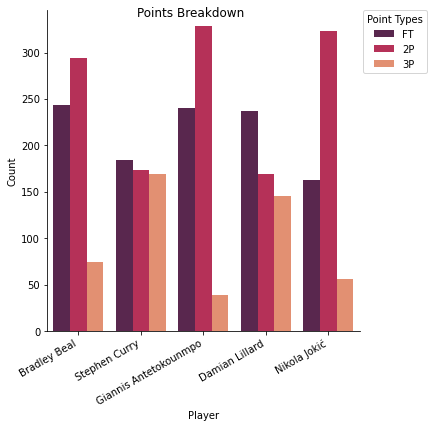

In [29]:
nba_top_5_points = pd.melt(nba_top_5, id_vars=['Player'], value_vars=['FT', '2P', '3P'])
nba_top_5_points

ax4 = sns.catplot(data=nba_top_5_points, x='Player', 
                  hue='variable', y='value', kind='bar', 
                  palette='rocket', legend_out=False)

ax4.fig.suptitle('Points Breakdown')
ax4.set_axis_labels('Player', 'Count')
plt.xticks(rotation=30, ha='right')

plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0, title='Point Types', loc='upper left')

Text(0.5, 0.98, 'Scatter Matrix of NBA 3 Pointers')

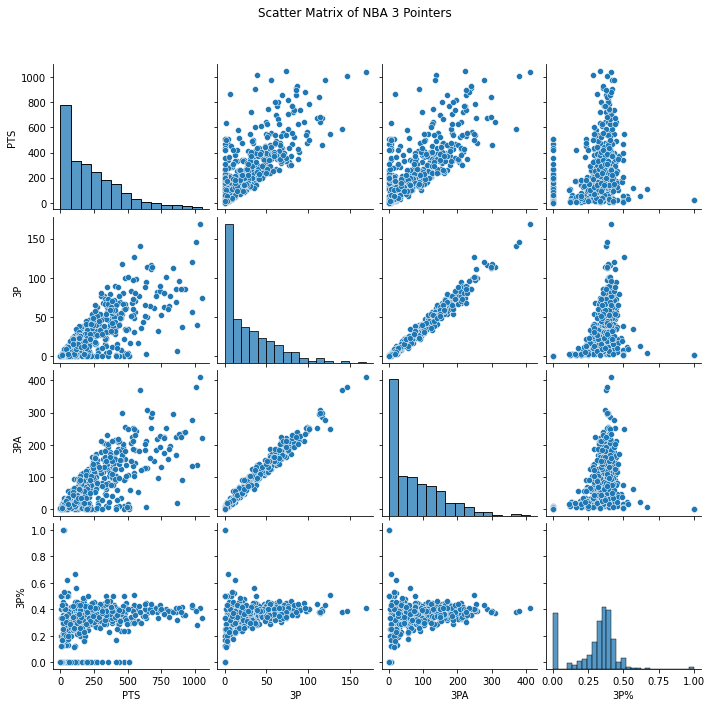

In [30]:
nba_three_pointers = nba[['PTS', '3P', '3PA', '3P%']]

fig1 = sns.pairplot(nba_three_pointers, palette='rocket')
fig1.fig.subplots_adjust(top=0.9)
fig1.fig.suptitle('Scatter Matrix of NBA 3 Pointers')

Text(0.5, 1.0, 'Three Point Attempt vs. Points Scored')

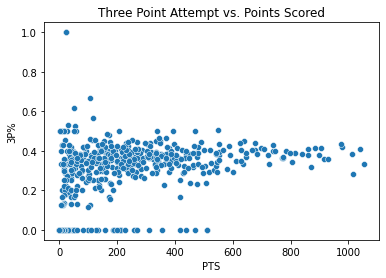

In [35]:
ax7 = sns.scatterplot(data=nba_three_pointers, x='PTS', y='3P%')
ax7.set_title('Three Point Attempt vs. Points Scored')

In [36]:
# Checking why there seem to be a high number of players with a low/ 0 three pointer percentage. 
# Nothing seems awry, it's potentially related to their playing position (C)
nba[(nba['3P%'] == 0) & (nba['PTS'] > 300)]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
85,84,Clint Capela,C,26,ATL,32,32,949,208,353,...,0.550,159,294,453,29,24,71,46,73,471
126,125,Andre Drummond,C,27,CLE,25,25,722,180,380,...,0.597,101,236,337,64,40,29,81,69,437
162,162,Rudy Gobert,C,28,UTA,36,36,1105,196,306,...,0.599,120,352,472,48,17,98,64,82,510
187,185,Montrezl Harrell,C,27,LAL,37,1,891,209,334,...,0.756,89,149,238,39,24,27,41,77,511
250,247,Enes Kanter,C,28,POR,35,23,919,177,298,...,0.750,146,269,415,40,18,26,41,94,417
379,368,Mason Plumlee,C,30,DET,34,34,953,145,239,...,0.674,94,217,311,130,28,29,72,120,354
509,492,Ivica Zubac,C,23,LAC,38,1,753,120,182,...,0.826,90,176,266,43,14,30,39,228,311


### Position Analysis

In [37]:
nba_positions = nba[['Player', 'PTS', 'Pos', 'Age', 'G', 'Tm']]

Text(0.5, 0.98, 'Scatter Matrix of 3 Pointers vs. other variables')

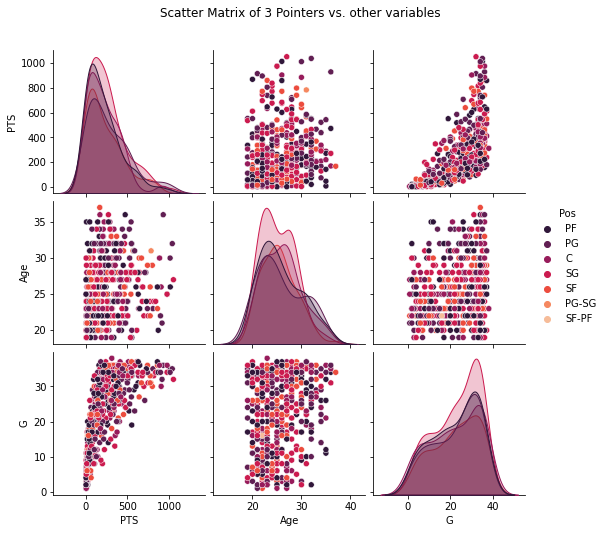

In [41]:
fig2 = sns.pairplot(nba_positions, hue='Pos', palette='rocket')
fig2.fig.subplots_adjust(top=0.9)
fig2.fig.suptitle('Scatter Matrix of 3 Pointers vs. other variables')

In [43]:
nba_position_average = nba_positions.groupby('Pos').mean()
nba_position_average = nba_position_average.reset_index(drop=False)

Text(0, 0.5, 'Points')

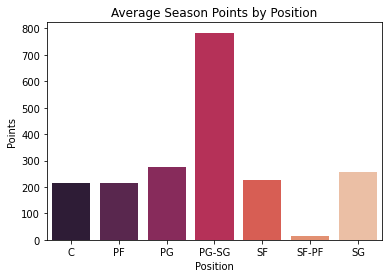

In [45]:
ax8 = sns.barplot(data=nba_position_average, x='Pos', y='PTS', palette='rocket')

ax8.set_title('Average Season Points by Position')
ax8.set_xlabel('Position')
ax8.set_ylabel('Points')

### Team Analysis

In [48]:
nba_team_sum = nba.groupby('Tm').sum()
nba_team_sum = nba_team_sum.reset_index(drop=False).sort_values('PTS', ascending=False)

Text(0, 0.5, 'Team')

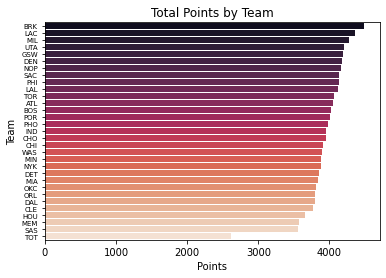

In [49]:
ax9 = sns.barplot(data=nba_team_sum, x='PTS', y='Tm', palette='rocket')

plt.yticks(fontsize=7)

ax9.set_title('Total Points by Team')
ax9.set_xlabel('Points')
ax9.set_ylabel('Team')

### Game Analysis

Text(0.5, 0, 'Games')

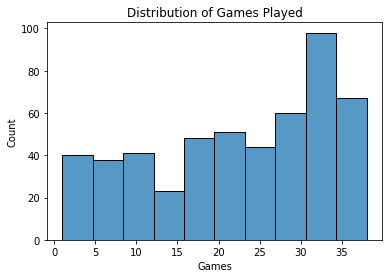

In [50]:
ax10 = sns.histplot(nba['G'], palette='rocket')

ax10.set_title('Distribution of Games Played')
ax10.set_xlabel('Games')

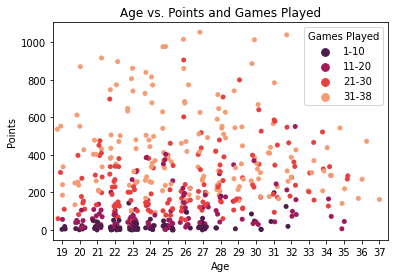

In [52]:
nba['G_bins'] = pd.cut(nba['G'], bins=[1,10,20,30,38], labels=['1-10', '11-20', '21-30', '31-38'])

ax11 = sns.stripplot(data=nba, x='Age', y='PTS', hue='G_bins', palette='rocket', jitter=0.3)

ax11.set_title('Age vs. Points and Games Played')
ax11.set_ylabel('Points')
plt.legend(title='Games Played')